In [1]:
import pandas as pd
import json
import zipfile

c:\Users\Mert\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Dataset_1: **Metahate annotations**
 - 1: hate speech
 - 0: not hate speech

In [9]:
df_1 = pd.read_csv('./data/available_metahate.tsv', sep='\t', encoding='utf-8')
df_1 = df_1.dropna()
df_1.head()

,label,text
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df_1.isna().sum()

label    0
text     0
dtype: int64

<Axes: xlabel='label'>

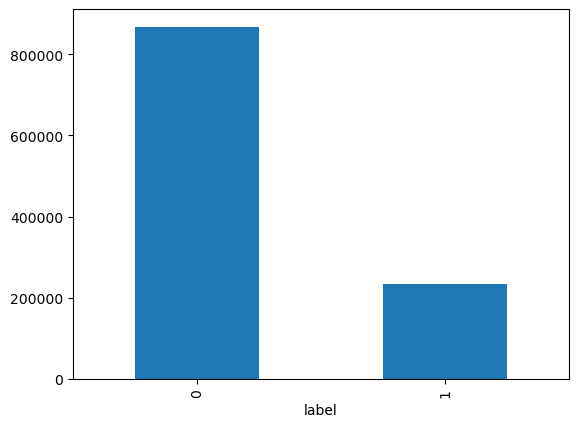

In [10]:
df_1["label"].value_counts().plot(kind='bar') #unbalanced dataset

In [40]:
ethos_data = pd.read_csv('./data/Ethos_Dataset_Multi_Label.csv',sep=';')

In [41]:
ethos_data.head()

,comment,violence,directed_vs_generalized,gender,race,national_origin,disability,religion,sexual_orientation
0,You should know women's sports are a joke,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
1,You look like Sloth with deeper Down’s syndrome,0.000000,0.833333,0.000000,0.000000,0.000000,1.0,0.0,0.0
2,You look like Russian and speak like Indian. B...,1.000000,0.500000,0.142857,0.142857,0.714286,0.0,0.0,0.0
3,"Women deserve to be abused, I guess.",0.666667,0.166667,1.000000,0.000000,0.000000,0.0,0.0,0.0
4,Women are made for making babies and cooking d...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0


In [23]:
dataset_annot = pd.read_csv('./data/NAACL_SRW_2016.csv',header=None)

In [ ]:
#We need to get the tweets from the API
dataset_annot.head()

,0,1
0,572342978255048705,racism
1,572341498827522049,racism
2,572340476503724032,racism
3,572334712804384768,racism
4,572332655397629952,racism


In [29]:
dataset_annot[1].unique()

array(['racism', 'sexism', 'none'], dtype=object)

# Dataset_2: **MMHS150K**

In [18]:
# Relative path to the ZIP file
zip_path = "./Data/MMHS150K.zip"
json_filename = "MMHS150K_GT.json"  # Ensure this matches the file inside the ZIP

# Open the ZIP file and read the JSON
with zipfile.ZipFile(zip_path, 'r') as zip_file:
    with zip_file.open(json_filename) as json_file:
        data = json.load(json_file)

mm_df = pd.DataFrame(data).T.reset_index().rename(columns={"index": "img_id"})
mm_df = mm_df[["img_id","tweet_text","labels","labels_str"]]
mm_df.head()

,img_id,tweet_text,labels,labels_str
0,1114679353714016256,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[4, 1, 3]","[Religion, Racist, Homophobe]"
1,1063020048816660480,My horses are retarded https://t.co/HYhqc6d5WN,"[5, 5, 5]","[OtherHate, OtherHate, OtherHate]"
2,1108927368075374593,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[0, 0, 0]","[NotHate, NotHate, NotHate]"
3,1114558534635618305,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[1, 0, 0]","[Racist, NotHate, NotHate]"
4,1035252480215592966,“EVERYbody calling you Nigger now!” https://t....,"[1, 0, 1]","[Racist, NotHate, Racist]"


In [19]:
mm_df.isna().sum()

img_id        0
tweet_text    0
labels        0
labels_str    0
dtype: int64

In [ ]:
mm_df

In [ ]:
#length of the data
mm_df["labels"].apply(lambda val: len(val)).unique()

array([3, 1, 2, 4, 5], dtype=int64)

In [5]:
len(mm_df)

149823